# Analisis de Ventas – Fundamentos de Data Science

Este notebook tiene como objetivo realizar un analisis exploratorio basico de un dataset de ventas utilizando Python.

Se aplican tecnicas de:
- Lectura de datos
- Exploracion inicial
- Limpieza de datos
- Transformacion
- Agregacion
- Analisis estadistico basico
- Visualizacion

El proposito es consolidar los fundamentos de manipulacion de datos y analisis exploratorio.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Carga del dataset

Se carga el archivo "ventas.csv" utilizand pandas y se almacena en un DataFrame para su posterior analisis.
Se visualizan las primeras filas del dataset para comprender su estructura general.

In [14]:
df = pd.read_csv('../data/ventas.csv')
df.head()


,fecha,region,producto,unidades,precio
0,2024-01-01,Norte,A,10.0,100.0
1,2024-01-01,Sur,B,5.0,200.0
2,2024-01-02,Norte,A,8.0,100.0
3,2024-01-02,Este,C,12.0,150.0
4,2024-01-03,Oeste,B,7.0,200.0


## Informacion estructural del dataset

Se analiza el tipo de datos de cada columna, valores nulos y estructura general.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fecha     17 non-null     object 
 1   region    16 non-null     object 
 2   producto  16 non-null     object 
 3   unidades  16 non-null     float64
 4   precio    16 non-null     float64
dtypes: float64(2), object(3)
memory usage: 812.0+ bytes


## Estadisticas descriptivas

Se obtienen estadisticas basicas de las variables numericas como:
- media
- minimo
- maximo
- percentiles

Pudiendo ver valores invalidos como numero negativos o valores en 0

In [16]:
df.describe()

,unidades,precio
count,16.000000,16.000000
mean,7.125000,131.250000
std,3.575379,65.510813
min,-3.000000,0.000000
25%,5.750000,100.000000
50%,7.500000,150.000000
75%,9.250000,200.000000
max,12.000000,200.000000


## Deteccion de problemas en los datos

Se identifican:
- Valores nulos
- Registros duplicados


In [17]:
df.isna().sum()

fecha       0
region      1
producto    1
unidades    1
precio      1
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(2)

## Limpieza de datos

Se eliminan:
- Filas con valores nulos
- Registros duplicados
- Valores invalidos (unidades negativas y precios en cero)

In [19]:
df = df.dropna()
df = df.drop_duplicates()
df = df[(df["unidades"] > 0) & (df["precio"] > 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fecha     9 non-null      object 
 1   region    9 non-null      object 
 2   producto  9 non-null      object 
 3   unidades  9 non-null      float64
 4   precio    9 non-null      float64
dtypes: float64(2), object(3)
memory usage: 432.0+ bytes


## Transformacion de datos

Se crea una nueva variable derivada llamada `ingresos`, que representa el ingreso generado por cada venta.


In [20]:
df["ingresos"] = df["unidades"] * df["precio"]
df.head()

,fecha,region,producto,unidades,precio,ingresos
0,2024-01-01,Norte,A,10.0,100.0,1000.0
1,2024-01-01,Sur,B,5.0,200.0,1000.0
2,2024-01-02,Norte,A,8.0,100.0,800.0
3,2024-01-02,Este,C,12.0,150.0,1800.0
4,2024-01-03,Oeste,B,7.0,200.0,1400.0


## Analisis de ingresos

Se calcula:
- Ingreso total
- Ingreso promedio por venta
- Ingreso minimo
- Ingreso maximo

In [21]:
ingreso_total = df["ingresos"].sum()
ingreso_promedio = df["ingresos"].mean()
ingreso_min = df["ingresos"].min()
ingreso_max = df["ingresos"].max()

ingreso_total, ingreso_promedio, ingreso_min, ingreso_max

(np.float64(9850.0),
 np.float64(1094.4444444444443),
 np.float64(600.0),
 np.float64(1800.0))

## Agregaciones

Se agrupan los datos para analizar el comportamiento por region y por producto.

In [22]:
ingresos_por_region = df.groupby('region')['ingresos'].sum()
ingresos_por_producto = df.groupby('producto')['ingresos'].sum()

## Visualizacion de datos

Se representan graficamente los ingresos para facilitar la interpretacion de los resultados.


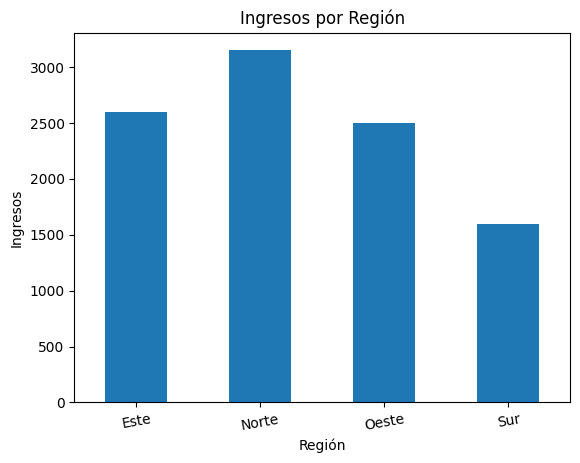

In [23]:
ingresos_por_region.plot(kind='bar', title='Ingresos por Región')
plt.xlabel('Región')
plt.ylabel('Ingresos')
plt.xticks(rotation=10)
plt.show()

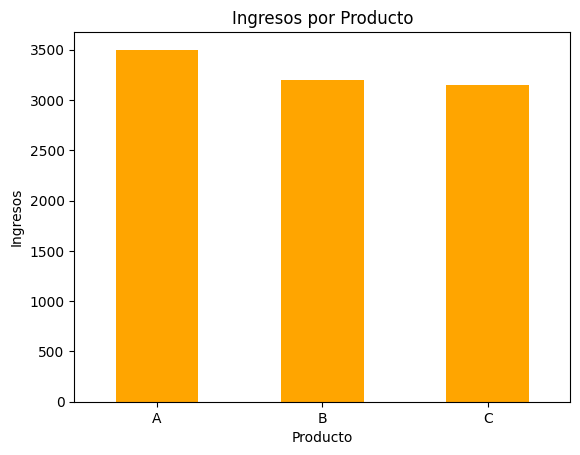

In [24]:
ingresos_por_producto.plot(kind='bar', title='Ingresos por Producto', color='orange')
plt.xlabel('Producto')
plt.ylabel('Ingresos')
plt.xticks(rotation=0)
plt.show()

## Conclusion

A partir del analisis realizado sobre el dataset de ventas, se obtuvieron los siguientes resultados relevantes:

- El ingreso total generado por las ventas fue de **$9850.0**.
- El ingreso promedio por operación de venta fue de **$1094.44**.
- El producto con mayor ingreso acumulado fue **A**.
- La región con mayor volumen de ingresos fue **Norte**.

Estos resultados permiten comprender:
- Que productos generan mayor impacto economico
- Que regiones presentan mayor consumo
- Como se distribuyen los ingresos dentro del sistema de ventas

En este analisis se logro:

- Comprender la estructura del dataset
- Detectar y corregir problemas de calidad de datos
- Aplicar limpieza de datos
- Crear variables derivadas
- Realizar agregaciones
- Obtener resultados de estadisticas basicas
- Visualizar patrones de ingresos

Este proceso representa un flujo tipico de trabajo en analisis de datos:
**ingesta → limpieza → transformación → analisis → visualizacion → interpretacion**
